In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk

In [2]:
df_train=pd.read_csv("sent_analysis_train.csv")
df_test=pd.read_csv("sent_analysis_test.csv")

In [3]:
df_train

,text,selected_text,sentiment,textID
0,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,0
1,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,1
2,my boss is bullying me...,bullying me,negative,2
3,what interview! leave me alone,leave me alone,negative,3
4,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,4
...,...,...,...,...
27476,wish we could come see u on Denver husband l...,d lost,negative,27476
27477,I`ve wondered about rake to. The client has ...,", don`t force",negative,27477
27478,Yay good for both of you. Enjoy the break - y...,Yay good for both of you.,positive,27478
27479,But it was worth it ****.,But it was worth it ****.,positive,27479


In [4]:
df_test

,text,sentiment
0,Last session of the day http://twitpic.com/67ezh,neutral
1,Shanghai is also really exciting (precisely -...,positive
2,"Recession hit Veronique Branquinho, she has to...",negative
3,happy bday!,positive
4,http://twitpic.com/4w75p - I like it!!,positive
...,...,...
3529,"its at 3 am, im very tired but i can`t sleep ...",negative
3530,All alone in this old house again. Thanks for...,positive
3531,I know what you mean. My little dog is sinkin...,negative
3532,_sutra what is your next youtube video gonna b...,positive


In [115]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder#Importing Onehot encoder and Label encoder
label_encoder = LabelEncoder()
class_to_number = {'negative': 0, 'neutral': 1, 'positive': 2}
label_encoder.fit(list(class_to_number.keys()))
df_train['sentiment'] = label_encoder.fit_transform(df_train['sentiment'].astype(str))
df_train

,text,selected_text,sentiment,textID
0,"I`d have responded, if I were going","I`d have responded, if I were going",1,0
1,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,0,1
2,my boss is bullying me...,bullying me,0,2
3,what interview! leave me alone,leave me alone,0,3
4,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",0,4
...,...,...,...,...
27476,wish we could come see u on Denver husband l...,d lost,0,27476
27477,I`ve wondered about rake to. The client has ...,", don`t force",0,27477
27478,Yay good for both of you. Enjoy the break - y...,Yay good for both of you.,2,27478
27479,But it was worth it ****.,But it was worth it ****.,2,27479


In [116]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder#Importing Onehot encoder and Label encoder
label_encoder = LabelEncoder()
class_to_number = {'negative': 0, 'neutral': 1, 'positive': 2}
label_encoder.fit(list(class_to_number.keys()))
df_test['sentiment'] = label_encoder.fit_transform(df_test['sentiment'].astype(str))
df_test

,text,sentiment
0,Last session of the day http://twitpic.com/67ezh,1
1,Shanghai is also really exciting (precisely -...,2
2,"Recession hit Veronique Branquinho, she has to...",0
3,happy bday!,2
4,http://twitpic.com/4w75p - I like it!!,2
...,...,...
3529,"its at 3 am, im very tired but i can`t sleep ...",0
3530,All alone in this old house again. Thanks for...,2
3531,I know what you mean. My little dog is sinkin...,0
3532,_sutra what is your next youtube video gonna b...,2


## EDA

<Axes: title={'center': 'Count of sentiment'}, xlabel='sentiment'>

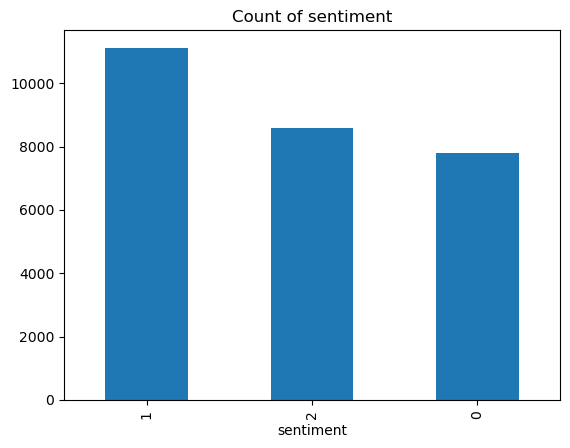

In [88]:
df_train['sentiment'].value_counts().plot(kind='bar',title='Count of sentiment')

## NLTK

In [6]:
example=df_train['text'][100]
example

'4am. And Im on the beach. Pretty'

In [7]:
tokens=nltk.word_tokenize(example)

In [8]:
tokens

['4am', '.', 'And', 'Im', 'on', 'the', 'beach', '.', 'Pretty']

In [9]:
nltk.data.path.append("/path/to/nltk_data")

In [10]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\harsh\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [11]:
#part of speech
taggs=nltk.pos_tag(tokens)
taggs

[('4am', 'CD'),
 ('.', '.'),
 ('And', 'CC'),
 ('Im', 'NNP'),
 ('on', 'IN'),
 ('the', 'DT'),
 ('beach', 'NN'),
 ('.', '.'),
 ('Pretty', 'VB')]

## VADER

In [12]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\harsh\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [91]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm
sia=SentimentIntensityAnalyzer()

In [92]:
sia

In [93]:
text='I am happy.'
sia.polarity_scores(text)


{'neg': 0.0, 'neu': 0.213, 'pos': 0.787, 'compound': 0.5719}

In [94]:
sia.polarity_scores(example)

{'neg': 0.0, 'neu': 0.652, 'pos': 0.348, 'compound': 0.4939}

In [95]:
res={}
for i,row in tqdm(df_train.iterrows(),total=len(df_train)):
    text=str(row['text'])
    res[i]=sia.polarity_scores(text)

  0%|          | 0/27481 [00:00<?, ?it/s]

In [96]:
df_train['text'][166]

'  #lichfield #tweetup sounds like fun  Hope to see you and everyone else there!'

In [97]:
res

{0: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 1: {'neg': 0.474, 'neu': 0.526, 'pos': 0.0, 'compound': -0.7437},
 2: {'neg': 0.494, 'neu': 0.506, 'pos': 0.0, 'compound': -0.5994},
 3: {'neg': 0.538, 'neu': 0.462, 'pos': 0.0, 'compound': -0.3595},
 4: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 5: {'neg': 0.154, 'neu': 0.577, 'pos': 0.269, 'compound': 0.4215},
 6: {'neg': 0.0, 'neu': 0.652, 'pos': 0.348, 'compound': 0.7506},
 7: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 8: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 9: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 10: {'neg': 0.0, 'neu': 0.58, 'pos': 0.42, 'compound': 0.9068},
 11: {'neg': 0.0, 'neu': 0.436, 'pos': 0.564, 'compound': 0.8431},
 12: {'neg': 0.459, 'neu': 0.541, 'pos': 0.0, 'compound': -0.6249},
 13: {'neg': 0.244, 'neu': 0.661, 'pos': 0.095, 'compound': -0.4215},
 14: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 15: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0

In [98]:
df=pd.DataFrame(res).T
df

,neg,neu,pos,compound
0,0.000,1.000,0.000,0.0000
1,0.474,0.526,0.000,-0.7437
2,0.494,0.506,0.000,-0.5994
3,0.538,0.462,0.000,-0.3595
4,0.000,1.000,0.000,0.0000
...,...,...,...,...
27476,0.128,0.722,0.150,0.1027
27477,0.000,0.890,0.110,0.3818
27478,0.000,0.572,0.428,0.9136
27479,0.000,0.680,0.320,0.3291


In [99]:
df.shape
df

,neg,neu,pos,compound
0,0.000,1.000,0.000,0.0000
1,0.474,0.526,0.000,-0.7437
2,0.494,0.506,0.000,-0.5994
3,0.538,0.462,0.000,-0.3595
4,0.000,1.000,0.000,0.0000
...,...,...,...,...
27476,0.128,0.722,0.150,0.1027
27477,0.000,0.890,0.110,0.3818
27478,0.000,0.572,0.428,0.9136
27479,0.000,0.680,0.320,0.3291


In [100]:
df_train.shape
df_train

,text,selected_text,sentiment,textID
0,"I`d have responded, if I were going","I`d have responded, if I were going",1,0
1,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,0,1
2,my boss is bullying me...,bullying me,0,2
3,what interview! leave me alone,leave me alone,0,3
4,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",0,4
...,...,...,...,...
27476,wish we could come see u on Denver husband l...,d lost,0,27476
27477,I`ve wondered about rake to. The client has ...,", don`t force",0,27477
27478,Yay good for both of you. Enjoy the break - y...,Yay good for both of you.,2,27478
27479,But it was worth it ****.,But it was worth it ****.,2,27479


In [101]:
df = df.reset_index().rename(columns={'index':'textID'})
df = df.merge(df_train, how='left')#, on='textID')

df

,textID,neg,neu,pos,compound,text,selected_text,sentiment
0,0,0.000,1.000,0.000,0.0000,"I`d have responded, if I were going","I`d have responded, if I were going",1
1,1,0.474,0.526,0.000,-0.7437,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,0
2,2,0.494,0.506,0.000,-0.5994,my boss is bullying me...,bullying me,0
3,3,0.538,0.462,0.000,-0.3595,what interview! leave me alone,leave me alone,0
4,4,0.000,1.000,0.000,0.0000,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",0
...,...,...,...,...,...,...,...,...
27476,27476,0.128,0.722,0.150,0.1027,wish we could come see u on Denver husband l...,d lost,0
27477,27477,0.000,0.890,0.110,0.3818,I`ve wondered about rake to. The client has ...,", don`t force",0
27478,27478,0.000,0.572,0.428,0.9136,Yay good for both of you. Enjoy the break - y...,Yay good for both of you.,2
27479,27479,0.000,0.680,0.320,0.3291,But it was worth it ****.,But it was worth it ****.,2


In [102]:
df

,textID,neg,neu,pos,compound,text,selected_text,sentiment
0,0,0.000,1.000,0.000,0.0000,"I`d have responded, if I were going","I`d have responded, if I were going",1
1,1,0.474,0.526,0.000,-0.7437,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,0
2,2,0.494,0.506,0.000,-0.5994,my boss is bullying me...,bullying me,0
3,3,0.538,0.462,0.000,-0.3595,what interview! leave me alone,leave me alone,0
4,4,0.000,1.000,0.000,0.0000,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",0
...,...,...,...,...,...,...,...,...
27476,27476,0.128,0.722,0.150,0.1027,wish we could come see u on Denver husband l...,d lost,0
27477,27477,0.000,0.890,0.110,0.3818,I`ve wondered about rake to. The client has ...,", don`t force",0
27478,27478,0.000,0.572,0.428,0.9136,Yay good for both of you. Enjoy the break - y...,Yay good for both of you.,2
27479,27479,0.000,0.680,0.320,0.3291,But it was worth it ****.,But it was worth it ****.,2


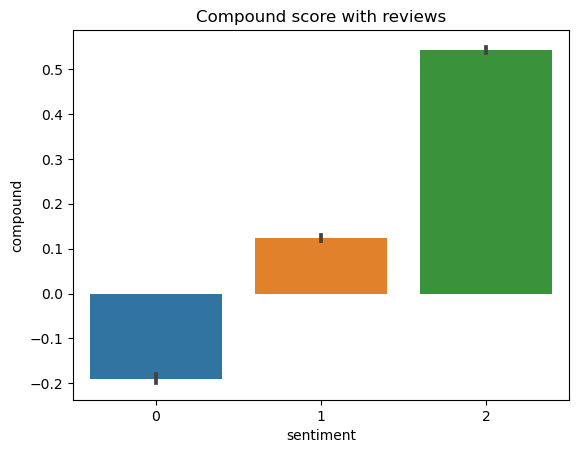

In [103]:
ax=sns.barplot(data=df,x='sentiment',y='compound')
ax.set_title('Compound score with reviews')
plt.show()

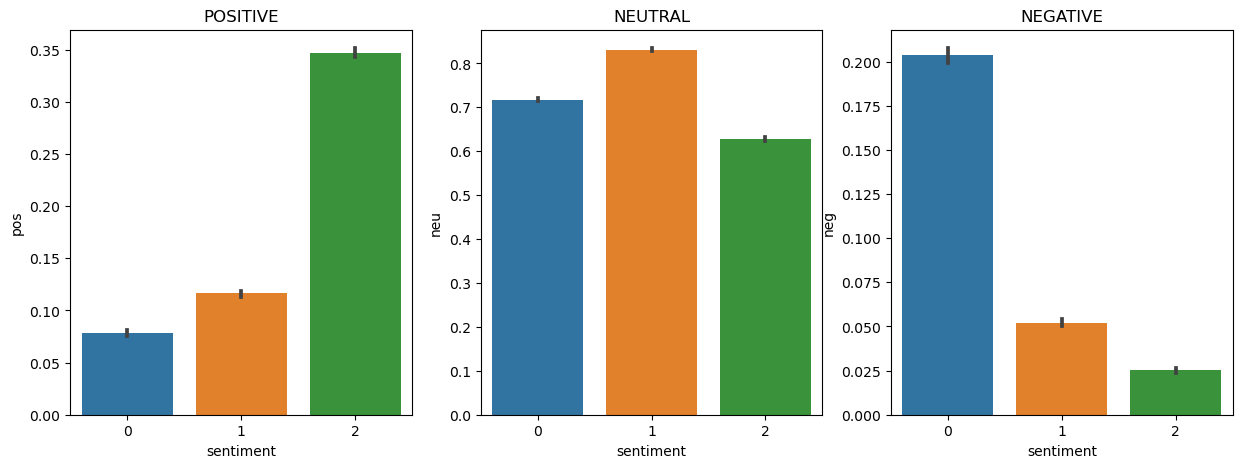

In [104]:
fig,axs=plt.subplots(1,3,figsize=(15,5))
sns.barplot(data=df,x='sentiment',y='pos',ax=axs[0])
sns.barplot(data=df,x='sentiment',y='neu',ax=axs[1])
sns.barplot(data=df,x='sentiment',y='neg',ax=axs[2])
axs[0].set_title('POSITIVE')
axs[1].set_title('NEUTRAL')
axs[2].set_title('NEGATIVE')
plt.show()

## Roberta Pretrained Model

In [29]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [30]:
model=f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(model)
model = AutoModelForSequenceClassification.from_pretrained(model)

C:\Users\harsh\anaconda3\Lib\site-packages\huggingface_hub\file_download.py:133: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\harsh\.cache\huggingface\hub. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)
C:\Users\harsh\anaconda3\Lib\site-packages\transformers\utils\generic.py:260: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. P

In [42]:
example

'4am. And Im on the beach. Pretty'

In [35]:
#VADER results on example
sia.polarity_scores(example)

{'neg': 0.0, 'neu': 0.652, 'pos': 0.348, 'compound': 0.4939}

In [41]:
encoded_text=tokenizer(example, return_tensors='pt')
output = model(**encoded_text)
scores = output[0][0].detach().numpy()
scores = softmax(scores)
scores_dict = {
    'roberta_neg' : scores[0],
    'roberta_neu' : scores[1],
    'roberta_pos' : scores[2]
}
print(scores_dict)

{'roberta_neg': 0.0036293808, 'roberta_neu': 0.13121669, 'roberta_pos': 0.86515397}


In [43]:
def polarity_scores_roberta(example):
    encoded_text=tokenizer(example, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta_neg' : scores[0],
        'roberta_neu' : scores[1],
        'roberta_pos' : scores[2]
    }
    return scores_dict

In [45]:
roberta_res={}
for i,row in tqdm(df_train.iterrows(),total=len(df_train)):
    text=str(row['text'])
    roberta_res[i] = polarity_scores_roberta(text)

  0%|          | 0/27481 [00:00<?, ?it/s]

In [46]:
roberta_res

{0: {'roberta_neg': 0.06493863,
  'roberta_neu': 0.8083176,
  'roberta_pos': 0.12674375},
 1: {'roberta_neg': 0.9181583,
  'roberta_neu': 0.06609959,
  'roberta_pos': 0.015742214},
 2: {'roberta_neg': 0.9246133,
  'roberta_neu': 0.07074072,
  'roberta_pos': 0.004645959},
 3: {'roberta_neg': 0.7830823,
  'roberta_neu': 0.19298004,
  'roberta_pos': 0.023937624},
 4: {'roberta_neg': 0.564197,
  'roberta_neu': 0.40457442,
  'roberta_pos': 0.031228568},
 5: {'roberta_neg': 0.11609095,
  'roberta_neu': 0.40458864,
  'roberta_pos': 0.47932038},
 6: {'roberta_neg': 0.0019260086,
  'roberta_neu': 0.027040249,
  'roberta_pos': 0.97103375},
 7: {'roberta_neg': 0.063866265,
  'roberta_neu': 0.50398564,
  'roberta_pos': 0.4321481},
 8: {'roberta_neg': 0.17585328,
  'roberta_neu': 0.71026224,
  'roberta_pos': 0.11388451},
 9: {'roberta_neg': 0.0017422289,
  'roberta_neu': 0.025500536,
  'roberta_pos': 0.9727572},
 10: {'roberta_neg': 0.5465044,
  'roberta_neu': 0.35181358,
  'roberta_pos': 0.1016819

In [48]:
roberta_df=pd.DataFrame(roberta_res).T
roberta_df

,roberta_neg,roberta_neu,roberta_pos
0,0.064939,0.808318,0.126744
1,0.918158,0.066100,0.015742
2,0.924613,0.070741,0.004646
3,0.783082,0.192980,0.023938
4,0.564197,0.404574,0.031229
...,...,...,...
27476,0.434403,0.445122,0.120474
27477,0.139543,0.635024,0.225433
27478,0.003337,0.022629,0.974034
27479,0.053331,0.357757,0.588912


In [49]:
roberta_df = roberta_df.reset_index().rename(columns={'index':'textID'})
roberta_df = roberta_df.merge(df_train, how='left')#, on='textID')

roberta_df

,textID,roberta_neg,roberta_neu,roberta_pos,text,selected_text,sentiment
0,0,0.064939,0.808318,0.126744,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,1,0.918158,0.066100,0.015742,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,2,0.924613,0.070741,0.004646,my boss is bullying me...,bullying me,negative
3,3,0.783082,0.192980,0.023938,what interview! leave me alone,leave me alone,negative
4,4,0.564197,0.404574,0.031229,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative
...,...,...,...,...,...,...,...
27476,27476,0.434403,0.445122,0.120474,wish we could come see u on Denver husband l...,d lost,negative
27477,27477,0.139543,0.635024,0.225433,I`ve wondered about rake to. The client has ...,", don`t force",negative
27478,27478,0.003337,0.022629,0.974034,Yay good for both of you. Enjoy the break - y...,Yay good for both of you.,positive
27479,27479,0.053331,0.357757,0.588912,But it was worth it ****.,But it was worth it ****.,positive


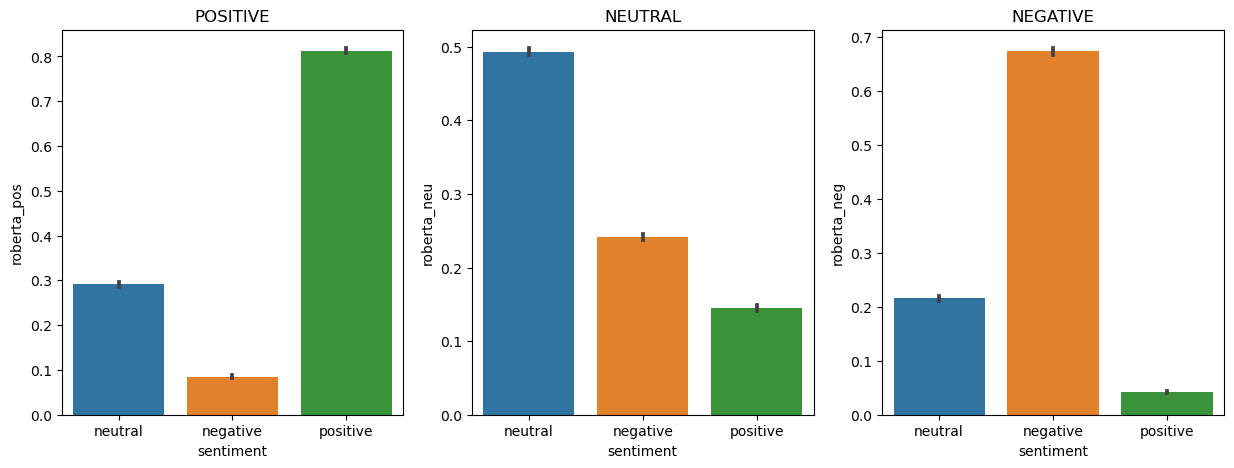

In [50]:
fig,axs=plt.subplots(1,3,figsize=(15,5))
sns.barplot(data=roberta_df,x='sentiment',y='roberta_pos',ax=axs[0])
sns.barplot(data=roberta_df,x='sentiment',y='roberta_neu',ax=axs[1])
sns.barplot(data=roberta_df,x='sentiment',y='roberta_neg',ax=axs[2])
axs[0].set_title('POSITIVE')
axs[1].set_title('NEUTRAL')
axs[2].set_title('NEGATIVE')
plt.show()

## For test data

In [117]:
vader_res_test={}
for i,row in tqdm(df_test.iterrows(),total=len(df_test)):
    text=str(row['text'])
    vader_res_test[i]=sia.polarity_scores(text)

  0%|          | 0/3534 [00:00<?, ?it/s]

In [118]:
vader_res_test

{0: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 1: {'neg': 0.0, 'neu': 0.67, 'pos': 0.33, 'compound': 0.7501},
 2: {'neg': 0.382, 'neu': 0.618, 'pos': 0.0, 'compound': -0.7345},
 3: {'neg': 0.0, 'neu': 0.2, 'pos': 0.8, 'compound': 0.6114},
 4: {'neg': 0.0, 'neu': 0.393, 'pos': 0.607, 'compound': 0.4738},
 5: {'neg': 0.0, 'neu': 0.363, 'pos': 0.637, 'compound': 0.7405},
 6: {'neg': 0.318, 'neu': 0.437, 'pos': 0.245, 'compound': -0.2103},
 7: {'neg': 0.207, 'neu': 0.669, 'pos': 0.124, 'compound': -0.3048},
 8: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 9: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 10: {'neg': 0.191, 'neu': 0.809, 'pos': 0.0, 'compound': -0.3818},
 11: {'neg': 0.0, 'neu': 0.441, 'pos': 0.559, 'compound': 0.5859},
 12: {'neg': 0.172, 'neu': 0.828, 'pos': 0.0, 'compound': -0.3164},
 13: {'neg': 0.109, 'neu': 0.891, 'pos': 0.0, 'compound': -0.4228},
 14: {'neg': 0.106, 'neu': 0.78, 'pos': 0.115, 'compound': 0.0516},
 15: {'neg': 0.317, '

In [119]:
vader_test_df=pd.DataFrame(vader_res_test).T
vader_test_df

,neg,neu,pos,compound
0,0.000,1.000,0.000,0.0000
1,0.000,0.670,0.330,0.7501
2,0.382,0.618,0.000,-0.7345
3,0.000,0.200,0.800,0.6114
4,0.000,0.393,0.607,0.4738
...,...,...,...,...
3529,0.160,0.840,0.000,-0.2724
3530,0.063,0.659,0.279,0.7835
3531,0.000,1.000,0.000,0.0000
3532,0.000,0.728,0.272,0.6696


In [120]:
df_test['sentiment'][3531]

0

In [121]:
y=vader_test_df['compound']
y_pred=[]
for i in range(len(y)):
    if y[i]>0.15:
        y_pred.append(2)
    elif y[i]<0:
        y_pred.append(0)
    else:
        y_pred.append(1)
y_pred

[1,
 2,
 0,
 2,
 2,
 2,
 0,
 0,
 1,
 1,
 0,
 2,
 0,
 0,
 1,
 0,
 0,
 1,
 2,
 0,
 0,
 0,
 0,
 1,
 0,
 2,
 2,
 1,
 1,
 1,
 1,
 0,
 2,
 1,
 1,
 1,
 2,
 1,
 0,
 2,
 1,
 0,
 2,
 1,
 2,
 2,
 2,
 2,
 0,
 0,
 2,
 1,
 1,
 2,
 1,
 2,
 2,
 1,
 2,
 2,
 1,
 0,
 0,
 0,
 2,
 1,
 2,
 1,
 1,
 1,
 2,
 2,
 0,
 2,
 1,
 0,
 0,
 1,
 2,
 1,
 2,
 1,
 1,
 2,
 2,
 2,
 2,
 0,
 2,
 1,
 1,
 2,
 2,
 1,
 1,
 0,
 0,
 2,
 1,
 2,
 2,
 1,
 2,
 1,
 2,
 2,
 1,
 1,
 2,
 2,
 1,
 1,
 2,
 2,
 0,
 2,
 2,
 1,
 2,
 1,
 0,
 2,
 2,
 0,
 2,
 0,
 2,
 2,
 0,
 1,
 2,
 1,
 1,
 1,
 2,
 1,
 1,
 2,
 2,
 2,
 0,
 0,
 2,
 2,
 0,
 2,
 2,
 1,
 1,
 0,
 0,
 2,
 2,
 1,
 1,
 2,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 1,
 1,
 1,
 2,
 2,
 2,
 0,
 1,
 2,
 0,
 1,
 2,
 2,
 0,
 1,
 2,
 2,
 2,
 0,
 0,
 2,
 2,
 1,
 1,
 1,
 0,
 0,
 2,
 2,
 0,
 2,
 2,
 2,
 1,
 2,
 2,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 2,
 2,
 1,
 2,
 2,
 2,
 0,
 0,
 1,
 2,
 0,
 0,
 2,
 2,
 2,
 1,
 0,
 0,
 2,
 0,
 0,
 1,
 1,
 2,
 2,
 0,
 2,
 0,
 1,
 2,
 0,
 2,
 2,
 0,
 0,
 0,
 1,
 1,
 2,
 1,
 0,


In [123]:
from sklearn.metrics import accuracy_score
y_true=df_test['sentiment']
acc=accuracy_score(y_pred,y_true)
print(acc)

0.6528013582342954


In [70]:
roberta_res_test={}
for i,row in tqdm(df_test.iterrows(),total=len(df_test)):
    text=str(row['text'])
    roberta_res_test[i] = polarity_scores_roberta(text)

  0%|          | 0/3534 [00:00<?, ?it/s]

In [71]:
roberta_res_test

{0: {'roberta_neg': 0.032424614,
  'roberta_neu': 0.9038953,
  'roberta_pos': 0.06368001},
 1: {'roberta_neg': 0.0011760677,
  'roberta_neu': 0.01317809,
  'roberta_pos': 0.98564583},
 2: {'roberta_neg': 0.9084552,
  'roberta_neu': 0.084444135,
  'roberta_pos': 0.007100634},
 3: {'roberta_neg': 0.0024100486,
  'roberta_neu': 0.013606701,
  'roberta_pos': 0.9839833},
 4: {'roberta_neg': 0.0012440949,
  'roberta_neu': 0.013876038,
  'roberta_pos': 0.98487985},
 5: {'roberta_neg': 0.0015623488,
  'roberta_neu': 0.0075378646,
  'roberta_pos': 0.9908998},
 6: {'roberta_neg': 0.948958,
  'roberta_neu': 0.043306205,
  'roberta_pos': 0.007735756},
 7: {'roberta_neg': 0.857621,
  'roberta_neu': 0.12733084,
  'roberta_pos': 0.0150481295},
 8: {'roberta_neg': 0.20300488,
  'roberta_neu': 0.7425047,
  'roberta_pos': 0.054490406},
 9: {'roberta_neg': 0.0056560975,
  'roberta_neu': 0.16748483,
  'roberta_pos': 0.826859},
 10: {'roberta_neg': 0.940477,
  'roberta_neu': 0.052117545,
  'roberta_pos': 0

In [73]:
roberta_test_df=pd.DataFrame(roberta_res_test).T
roberta_test_df

,roberta_neg,roberta_neu,roberta_pos
0,0.032425,0.903895,0.063680
1,0.001176,0.013178,0.985646
2,0.908455,0.084444,0.007101
3,0.002410,0.013607,0.983983
4,0.001244,0.013876,0.984880
...,...,...,...
3529,0.481048,0.440535,0.078417
3530,0.018756,0.113922,0.867322
3531,0.715462,0.256034,0.028504
3532,0.001191,0.010310,0.988500


In [83]:
#y_pred=roberta_test_df[['roberta_neg'],['roberta_pos'],['roberta_neu']].max(axis=1)
y_pred2 = []
for i in range(len(roberta_test_df)):
    x = roberta_test_df[['roberta_neg', 'roberta_pos', 'roberta_neu']].iloc[i].max()
    neg_val = roberta_test_df['roberta_neg'].iloc[i]
    pos_val = roberta_test_df['roberta_pos'].iloc[i]
    neu_val = roberta_test_df['roberta_neu'].iloc[i]
    if x == neg_val:
        y_pred2.append(0)
    elif x == pos_val:
        y_pred2.append(2)
    else:
        y_pred2.append(1)

y_true = df_test['sentiment']



In [84]:
from sklearn.metrics import accuracy_score
y_true=df_test['sentiment']
acc=accuracy_score(y_pred2,y_true)
print(acc)

0.7178834182229767


## OTHER ML/DL MODELS

In [124]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb


### ON VADER VALUES

In [154]:
col=['neg','neu','pos','compound']
X_train=df[col].values
X_train

array([[ 0.    ,  1.    ,  0.    ,  0.    ],
       [ 0.474 ,  0.526 ,  0.    , -0.7437],
       [ 0.494 ,  0.506 ,  0.    , -0.5994],
       ...,
       [ 0.    ,  0.572 ,  0.428 ,  0.9136],
       [ 0.    ,  0.68  ,  0.32  ,  0.3291],
       [ 0.    ,  0.458 ,  0.542 ,  0.8074]])

In [155]:
X_test=vader_test_df[col].values
X_test

array([[ 0.    ,  1.    ,  0.    ,  0.    ],
       [ 0.    ,  0.67  ,  0.33  ,  0.7501],
       [ 0.382 ,  0.618 ,  0.    , -0.7345],
       ...,
       [ 0.    ,  1.    ,  0.    ,  0.    ],
       [ 0.    ,  0.728 ,  0.272 ,  0.6696],
       [ 0.    ,  0.603 ,  0.397 ,  0.5093]])

In [128]:
models = {
    'Random Forest': RandomForestClassifier(),
    'Logistic Regression': LogisticRegression(),
    'SVM': SVC(),
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Naive Bayes': GaussianNB(),
    'XGBoost': xgb.XGBClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()
}


In [132]:
from sklearn.metrics import accuracy_score
y_true=df_test['sentiment']
y=df_train['sentiment']
for name, model in models.items():
    model.fit(X_train, y)
    y_pred = model.predict(X_test)
    print(f"Model: {name}")
    acc=accuracy_score(y_pred,y_true)
    print(acc)

Model: Random Forest
0.6494057724957555
Model: Logistic Regression
0.6661007357102433
Model: SVM
0.6754385964912281
Model: KNN
0.653084323712507
Model: Decision Tree
0.6338426711941143
Model: Naive Bayes
0.6641199773627617
Model: XGBoost
0.6694963214487832
Model: Gradient Boosting
0.6751556310130165


### Simple NN

In [156]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Define the model architecture
model = Sequential([
    Dense(64, activation='relu', input_shape=(4,)),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dense(3, activation='softmax')
])

# Compile the model
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=Adam(learning_rate=0.001),
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y, epochs=10, batch_size=32)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_true)

print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)

Epoch 1/10
859/859 [==============================] - 4s 3ms/step - loss: 0.8386 - accuracy: 0.6404
Epoch 2/10
859/859 [==============================] - 3s 3ms/step - loss: 0.8027 - accuracy: 0.6595
Epoch 3/10
859/859 [==============================] - 3s 3ms/step - loss: 0.7972 - accuracy: 0.6595
Epoch 4/10
859/859 [==============================] - 2s 3ms/step - loss: 0.7972 - accuracy: 0.6601
Epoch 5/10
859/859 [==============================] - 3s 3ms/step - loss: 0.7949 - accuracy: 0.6633
Epoch 6/10
859/859 [==============================] - 3s 3ms/step - loss: 0.7927 - accuracy: 0.6639
Epoch 7/10
859/859 [==============================] - 3s 3ms/step - loss: 0.7920 - accuracy: 0.6636
Epoch 8/10
859/859 [==============================] - 3s 3ms/step - loss: 0.7924 - accuracy: 0.6625
Epoch 9/10
859/859 [==============================] - 2s 3ms/step - loss: 0.7903 - accuracy: 0.6623
Epoch 10/10
111/111 [==============================] - 0s 3ms/step - loss: 0.7641 - accuracy: 0.6786

### ON ROBERTA DATA

In [133]:
col=['roberta_neg','roberta_neu','roberta_pos']
X_train=roberta_df[col].values
X_train

array([[0.06493863, 0.8083176 , 0.12674375],
       [0.9181583 , 0.06609959, 0.01574221],
       [0.9246133 , 0.07074072, 0.00464596],
       ...,
       [0.00333658, 0.02262946, 0.9740339 ],
       [0.05333126, 0.35775676, 0.58891195],
       [0.01230519, 0.15056942, 0.8371254 ]], dtype=float32)

In [134]:
X_test=roberta_test_df[col].values
X_test

array([[0.03242461, 0.9038953 , 0.06368001],
       [0.00117607, 0.01317809, 0.98564583],
       [0.9084552 , 0.08444414, 0.00710063],
       ...,
       [0.715462  , 0.2560344 , 0.02850351],
       [0.00119065, 0.01030972, 0.9884997 ],
       [0.00209978, 0.0708665 , 0.9270338 ]], dtype=float32)

In [138]:
models = {
    'Random Forest': RandomForestClassifier(),
    'Logistic Regression': LogisticRegression(),
    'SVM': SVC(),
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Naive Bayes': GaussianNB(),
    'XGBoost': xgb.XGBClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()
}

In [139]:
from sklearn.metrics import accuracy_score
y_true=df_test['sentiment']
y=df_train['sentiment']
for name, model in models.items():
    model.fit(X_train, y)
    y_pred = model.predict(X_test)
    print(f"Model: {name}")
    acc=accuracy_score(y_pred,y_true)
    print(acc)

Model: Random Forest
0.7088285229202037
Model: Logistic Regression
0.7368421052631579
Model: SVM
0.7388228636106395
Model: KNN
0.7074136955291455
Model: Decision Tree
0.6570458404074703
Model: Naive Bayes
0.7246745897000566
Model: XGBoost
0.7337294850028296
Model: Gradient Boosting
0.7385398981324278


## Simple Neural Network

In [141]:
input_shape=X_train.shape
input_shape

(27481, 3)

In [146]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Define the model architecture
model = Sequential([
    Dense(64, activation='relu', input_shape=(3,)),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dense(3, activation='softmax')
])

# Compile the model
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=Adam(learning_rate=0.001),
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y, epochs=10, batch_size=32)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_true)

print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)

Epoch 1/10
859/859 [==============================] - 4s 3ms/step - loss: 0.6739 - accuracy: 0.7265
Epoch 2/10
859/859 [==============================] - 3s 3ms/step - loss: 0.6339 - accuracy: 0.7387
Epoch 3/10
859/859 [==============================] - 3s 3ms/step - loss: 0.6267 - accuracy: 0.7384
Epoch 4/10
859/859 [==============================] - 3s 3ms/step - loss: 0.6244 - accuracy: 0.7379
Epoch 5/10
859/859 [==============================] - 3s 3ms/step - loss: 0.6201 - accuracy: 0.7389
Epoch 6/10
859/859 [==============================] - 3s 3ms/step - loss: 0.6216 - accuracy: 0.7379
Epoch 7/10
859/859 [==============================] - 3s 3ms/step - loss: 0.6185 - accuracy: 0.7369
Epoch 8/10
859/859 [==============================] - 3s 3ms/step - loss: 0.6172 - accuracy: 0.7377
Epoch 9/10
859/859 [==============================] - 3s 3ms/step - loss: 0.6143 - accuracy: 0.7386
Epoch 10/10
111/111 [==============================] - 1s 3ms/step - loss: 0.6042 - accuracy: 0.7357